In [1]:
#dependencies
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_palette("pastel")

In [2]:
data = pd.read_csv('../../data/train_month_3_with_target.csv',parse_dates = [29,30,32])
print(f'Rows: {data.client_id.count()}')
print(f'Columns: {data.columns.size}')
print(data.info())
data.head()

Rows: 63697
Columns: 40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   client_id                          63697 non-null  object        
 1   homebanking_active                 63697 non-null  int64         
 2   has_homebanking                    63697 non-null  int64         
 3   has_insurance_21                   63697 non-null  int64         
 4   has_insurance_23                   63697 non-null  int64         
 5   has_life_insurance_fixed_cap       63697 non-null  int64         
 6   has_life_insurance_decreasing_cap  63697 non-null  int64         
 7   has_fire_car_other_insurance       63697 non-null  int64         
 8   has_personal_loan                  63697 non-null  int64         
 9   has_mortgage_loan                  63697 non-null  int64         
 10  has_curren

,client_id,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,...,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,1994-08-01,1,1943-09-01,3630,9.0,0,0.0,NaN,NaN,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,2017-01-01,1,1994-02-01,2460,9.0,0,NaN,mature,couple,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,1980-12-01,2,1936-10-01,2660,9.0,0,NaN,NaN,single,0
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,2013-10-01,1,1946-09-01,6600,9.0,0,NaN,NaN,NaN,0
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,2012-11-01,2,1996-04-01,8550,9.0,0,NaN,mature,couple,1


In [3]:
# cast types 

cols_binary = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter','customer_self_employed']

data[cols_binary] = data[cols_binary].astype('bool')
data['target'] = data['target'].astype('bool')

cols_object = ['customer_occupation_code', 'customer_postal_code', 'customer_education', 'customer_children',
       'customer_relationship','customer_gender']

data[cols_object] = data[cols_object].astype('object')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   client_id                          63697 non-null  object        
 1   homebanking_active                 63697 non-null  bool          
 2   has_homebanking                    63697 non-null  bool          
 3   has_insurance_21                   63697 non-null  bool          
 4   has_insurance_23                   63697 non-null  bool          
 5   has_life_insurance_fixed_cap       63697 non-null  bool          
 6   has_life_insurance_decreasing_cap  63697 non-null  bool          
 7   has_fire_car_other_insurance       63697 non-null  bool          
 8   has_personal_loan                  63697 non-null  bool          
 9   has_mortgage_loan                  63697 non-null  bool          
 10  has_current_account               

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bal_insurance_21,63697.0,457.960187,1641.970743,0.0,0.0,0.0,0.0,10000.0
bal_insurance_23,63697.0,47.432375,536.978630,0.0,0.0,0.0,0.0,9890.0
cap_life_insurance_fixed_cap,63697.0,78.260044,2538.927213,0.0,0.0,0.0,0.0,220000.0
cap_life_insurance_decreasing_cap,63697.0,11565.570592,40229.761726,0.0,0.0,0.0,0.0,780000.0
prem_fire_car_other_insurance,63697.0,183.667049,368.599652,0.0,0.0,0.0,240.0,3000.0
bal_personal_loan,63697.0,402.469347,2662.560352,0.0,0.0,0.0,0.0,71690.0
bal_mortgage_loan,63697.0,8868.815486,35525.256697,0.0,0.0,0.0,0.0,490000.0
bal_current_account,63697.0,1323.660612,2685.727023,-1000.0,0.0,0.0,1520.0,20000.0
bal_pension_saving,63697.0,233.421982,2140.173418,0.0,0.0,0.0,0.0,41170.0
bal_savings_account,63697.0,17872.484889,11750.868466,0.0,8450.0,15170.0,25480.0,50000.0


In [5]:
col_cat = ['customer_occupation_code', 'customer_education','customer_children', 'customer_relationship']
cols_cat_num = ['customer_occupation_code', 'customer_education']
cols_cat_str = ['customer_children', 'customer_relationship']

for (columnName, columnData) in data[col_cat].iteritems():
        print(columnName)
        print(columnData.value_counts(dropna=False))
        print('-'*60)

customer_occupation_code
9.0    58836
NaN     2002
4.0     1639
0.0      421
8.0      318
6.0      183
5.0      153
7.0      104
1.0       24
3.0       10
2.0        7
Name: customer_occupation_code, dtype: int64
------------------------------------------------------------
customer_education
NaN    47125
3.0     5015
2.0     4506
0.0     2178
5.0     2064
1.0     1802
4.0      696
6.0      311
Name: customer_education, dtype: int64
------------------------------------------------------------
customer_children
NaN           23364
no            22886
mature         4849
adolescent     3912
young          2652
preschool      2322
grownup        1908
onebaby        1466
yes             338
Name: customer_children, dtype: int64
------------------------------------------------------------
customer_relationship
couple    36179
NaN       14899
single    12619
Name: customer_relationship, dtype: int64
------------------------------------------------------------


In [6]:
print("-"*50)
print('% NAN:')
print("-"*50)
print((data.isna().sum()/63697).sort_values(ascending = False).head(10))

--------------------------------------------------
% NAN:
--------------------------------------------------
customer_education          0.739831
customer_children           0.366799
customer_relationship       0.233904
customer_occupation_code    0.031430
customer_since_bank         0.003909
customer_since_all          0.003674
visits_distinct_so          0.000000
bal_current_account         0.000000
bal_pension_saving          0.000000
bal_savings_account         0.000000
dtype: float64


for all the nan in the categorical data, it can be marked at "unknown" and still be informative! the distribution of the "customer since bank" and "customer_since_all" must be investigated before making a determination on how to process.

In [7]:
 for col in data.select_dtypes(include = 'object').columns: 
    data.fillna({col:"unknown"},inplace = True)

In [8]:
print("-"*50)
print('Target classes')
print("-"*50)
print(data.target.value_counts(normalize = True))

--------------------------------------------------
Target classes
--------------------------------------------------
False    0.969967
True     0.030033
Name: target, dtype: float64


In [9]:
# Date to years value conversion 
data['customer_since_all_years'] = (2018-data.customer_since_all.dt.year)
data['customer_since_bank_years'] = (2018-data.customer_since_bank.dt.year)
data['customer_age'] = (2018-data.customer_birth_date.dt.year)

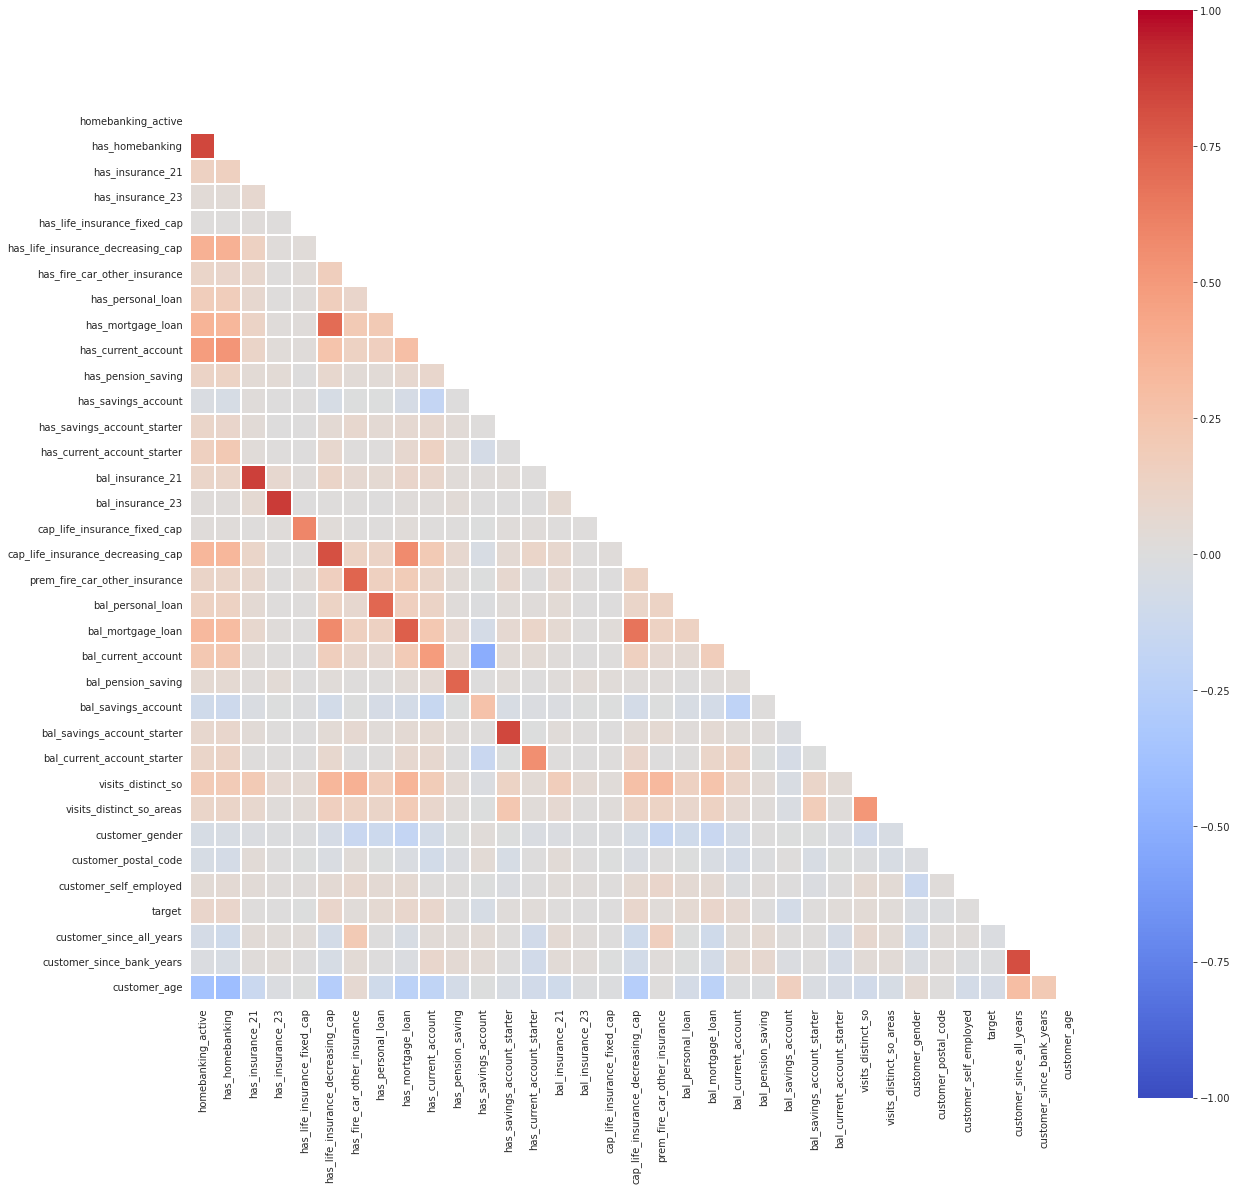

In [10]:
corrs = data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corrs
                     , mask=mask
                     , square=True
                     , vmin = -1
                     , vmax = 1
                     , center = 0
                     , cmap="coolwarm"
                     , linewidth = 0.1
#                      , robust = True
                    )

In [93]:
def find_collinearity(data,threshold =0.7):
    corrs = data.corr()
    
    # buil list
    df = (corrs[(abs(corrs)>threshold) & (corrs != 1 )])
    l = []
    df_na = df.isna()         
    for row in range(df.shape[0]):
        for col in range(row+1,df.shape[1]):
            if df_na.iloc[row,col] == False:
                l.append((df.index[row],df.columns[col],df.iloc[row,col]))

    l.sort(key=lambda tup: tup[2],reverse =True)
    for i in l:
        print(i)
    
    return l
    
colinear_vars = find_collinearity(data)

('has_insurance_23', 'bal_insurance_23', 0.8809757682838544)
('has_insurance_21', 'bal_insurance_21', 0.8607111637902847)
('has_savings_account_starter', 'bal_savings_account_starter', 0.8365734642895831)
('homebanking_active', 'has_homebanking', 0.836033822763644)
('customer_since_all_years', 'customer_since_bank_years', 0.8190303544519462)
('has_life_insurance_decreasing_cap', 'cap_life_insurance_decreasing_cap', 0.8104066074657014)
('has_mortgage_loan', 'bal_mortgage_loan', 0.7570115926797555)
('has_fire_car_other_insurance', 'prem_fire_car_other_insurance', 0.7296349752685147)
('has_pension_saving', 'bal_pension_saving', 0.7278206796956318)
('has_personal_loan', 'bal_personal_loan', 0.7253715198367517)


In [96]:
target_corrs = abs(corrs.target).sort_values(ascending = False)
print("-"*50)
print('correlations with target')
print("-"*50)
print(target_corrs)

--------------------------------------------------
correlations with target
--------------------------------------------------
target                               1.000000
homebanking_active                   0.101469
has_homebanking                      0.098962
bal_mortgage_loan                    0.096654
has_life_insurance_decreasing_cap    0.094047
has_mortgage_loan                    0.093194
has_current_account                  0.093078
cap_life_insurance_decreasing_cap    0.086488
bal_savings_account                  0.071638
bal_current_account                  0.062886
has_personal_loan                    0.061892
bal_personal_loan                    0.059351
customer_age                         0.059206
has_savings_account                  0.048442
visits_distinct_so                   0.042301
customer_gender                      0.027157
visits_distinct_so_areas             0.026775
prem_fire_car_other_insurance        0.026698
has_fire_car_other_insurance         0.025787

In [105]:
print('cols to drop due to high colinearity and low correlation with target')
l = []
for tup in colinear_vars:
    if target_corrs.loc[tup[0]] > target_corrs.loc[tup[1]]:
        l.append(tup[1])        
    else:
        l.append(tup[0])
l    

cols to drop due to high colinearity and low correlation with target


['bal_insurance_23',
 'bal_insurance_21',
 'bal_savings_account_starter',
 'has_homebanking',
 'customer_since_bank_years',
 'cap_life_insurance_decreasing_cap',
 'has_mortgage_loan',
 'has_fire_car_other_insurance',
 'bal_pension_saving',
 'bal_personal_loan']

In [12]:
print('-'*65)
print('are missing value correlated with target?')
print('-'*65)
check_corr = ['customer_education','customer_children','customer_relationship','customer_occupation_code','customer_since_bank']
for var in check_corr:
    print('%s:\t%f' % (var,data[var].isna().corr(data.target) ))

-----------------------------------------------------------------
are missing value correlated with target?
-----------------------------------------------------------------
customer_education:	nan
customer_children:	nan
customer_relationship:	nan
customer_occupation_code:	nan
customer_since_bank:	0.009614


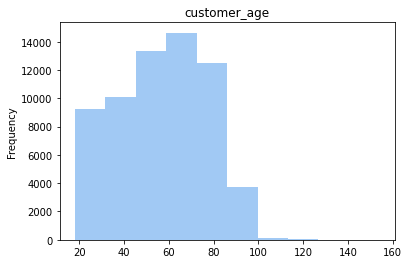

Customers over 115 y/o: 33
Customers over 115 y/o (churners): 0


In [13]:
data['customer_age'].plot(kind = 'hist', title = 'customer_age')
age_threshold = 115
outlier = data[(data['customer_age']>age_threshold)].client_id.count()
outlier1 = data[(data['customer_age']>age_threshold)&(data['target']==1)].client_id.count()
plt.show()
print('Customers over %i y/o: %i' % (age_threshold,outlier))
print('Customers over %i y/o (churners): %i' % (age_threshold,outlier1))

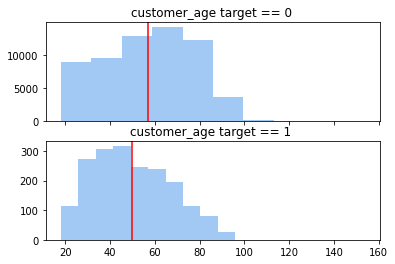

In [14]:
col = 'customer_age'
f,(ax1,ax2)=plt.subplots(2,1,sharex = True)
ax1.hist(data[data['target']==0][col])
ax1.set_title(col + ' target == 0 ')
ax1.axvline(x = np.mean(data[data['target']==0][col]), color = 'r')
ax2.hist(data[data['target']==1][col])
ax2.set_title(col + ' target == 1 ')
ax2.axvline(x = np.mean(data[data['target']==1][col]), color = 'r')

<AxesSubplot:xlabel='customer_age', ylabel='Probability'>

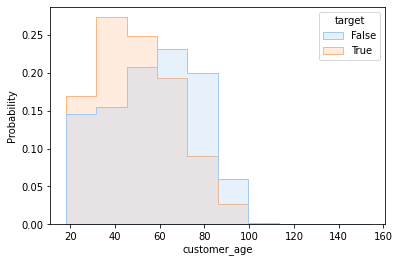

In [15]:
sns.histplot(data = data
                 ,x = 'customer_age'
                 ,hue = 'target'
                 ,stat = "probability"
                 ,common_norm = False
                 ,bins = 10
                 ,element="step"
            )

In [16]:
print('-'*65)
print('is age correlated with other features?')
print('-'*65)
print(abs(data.corr().customer_age).sort_values(ascending = False).head(10))

-----------------------------------------------------------------
is age correlated with other features?
-----------------------------------------------------------------
customer_age                         1.000000
has_homebanking                      0.405673
homebanking_active                   0.365088
customer_since_all_years             0.295172
has_life_insurance_decreasing_cap    0.270308
cap_life_insurance_decreasing_cap    0.262327
has_mortgage_loan                    0.224595
bal_mortgage_loan                    0.223849
customer_since_bank_years            0.208135
has_current_account                  0.202742
Name: customer_age, dtype: float64


In [17]:
data.customer_occupation_code.value_counts(normalize = True)

9.0        0.923686
unknown    0.031430
4.0        0.025731
0.0        0.006609
8.0        0.004992
6.0        0.002873
5.0        0.002402
7.0        0.001633
1.0        0.000377
3.0        0.000157
2.0        0.000110
Name: customer_occupation_code, dtype: float64

In [18]:
data.groupby('customer_occupation_code').target.value_counts(normalize = True)

customer_occupation_code  target
0.0                       False     0.973872
                          True      0.026128
1.0                       False     1.000000
2.0                       False     1.000000
3.0                       False     0.900000
                          True      0.100000
4.0                       False     0.958511
                          True      0.041489
5.0                       False     0.928105
                          True      0.071895
6.0                       False     0.945355
                          True      0.054645
7.0                       False     0.961538
                          True      0.038462
8.0                       False     0.962264
                          True      0.037736
9.0                       False     0.970783
                          True      0.029217
unknown                   False     0.961538
                          True      0.038462
Name: target, dtype: float64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   client_id                          63697 non-null  object        
 1   homebanking_active                 63697 non-null  bool          
 2   has_homebanking                    63697 non-null  bool          
 3   has_insurance_21                   63697 non-null  bool          
 4   has_insurance_23                   63697 non-null  bool          
 5   has_life_insurance_fixed_cap       63697 non-null  bool          
 6   has_life_insurance_decreasing_cap  63697 non-null  bool          
 7   has_fire_car_other_insurance       63697 non-null  bool          
 8   has_personal_loan                  63697 non-null  bool          
 9   has_mortgage_loan                  63697 non-null  bool          
 10  has_current_account               

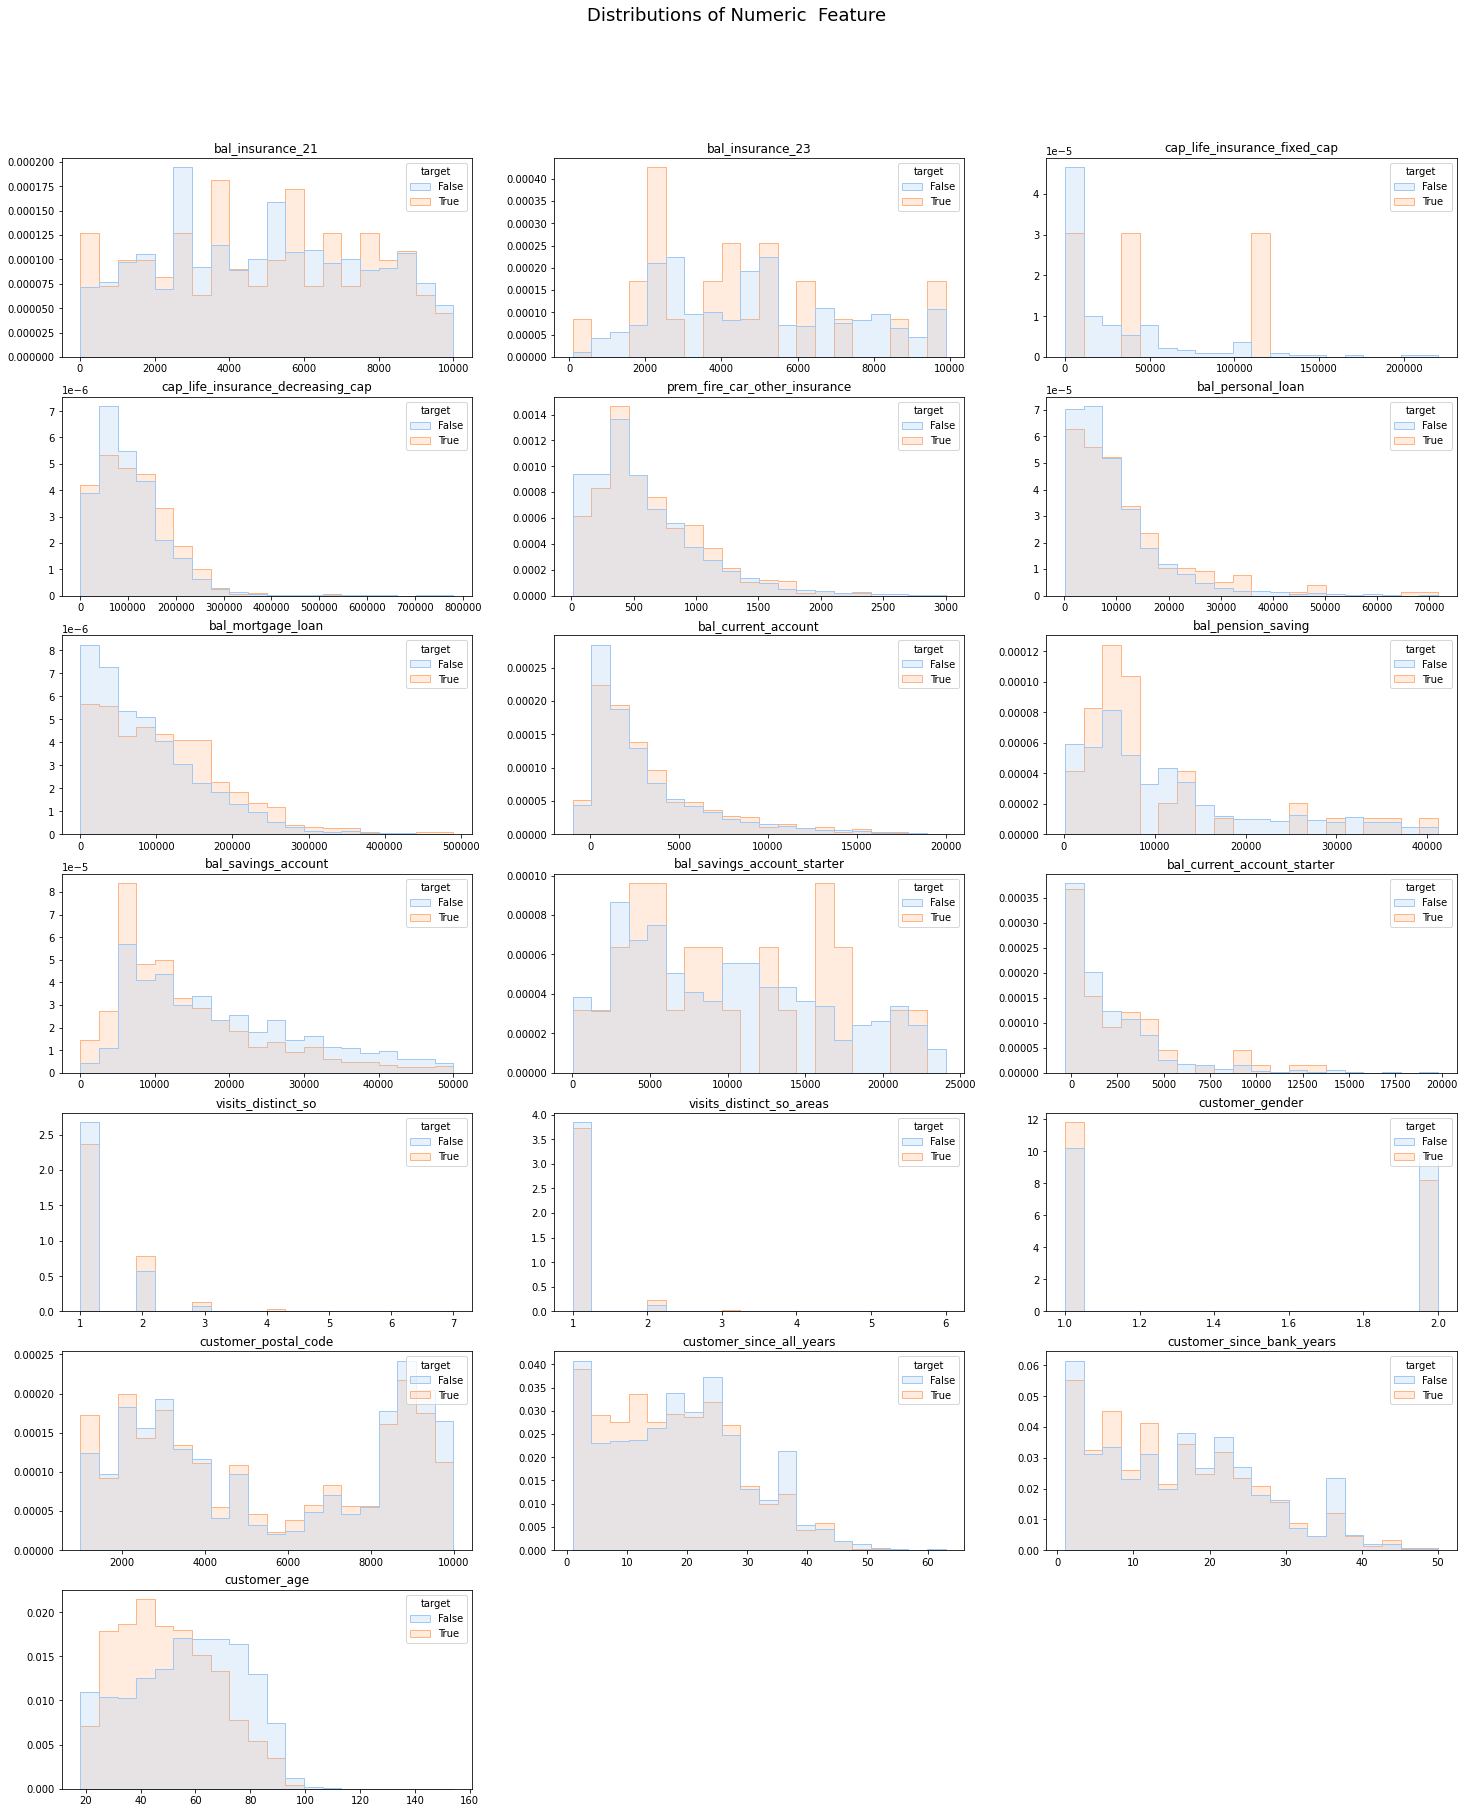

In [20]:
plt.figure(figsize=(25, 30))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Distributions of Numeric  Feature", fontsize=18, y=0.95)

cols_cont = data.select_dtypes(include = 'number').columns
ncols = 3
nrows = len(cols_cont) // ncols + (len(cols_cont) % ncols > 0) # calculate number of rows

for n, col in enumerate(cols_cont):
    ax = plt.subplot(nrows, ncols, n + 1) 
    data_nozero = data[data[col]!=0]
    sns.histplot(data = data_nozero
                 ,x = col
                 ,hue = 'target'
                 ,bins = 20
                 ,stat = "density"
                 ,common_norm = False
                 ,element="step"
                ).set(xlabel=None, ylabel = None)
    plt.title(col)

plt.show()

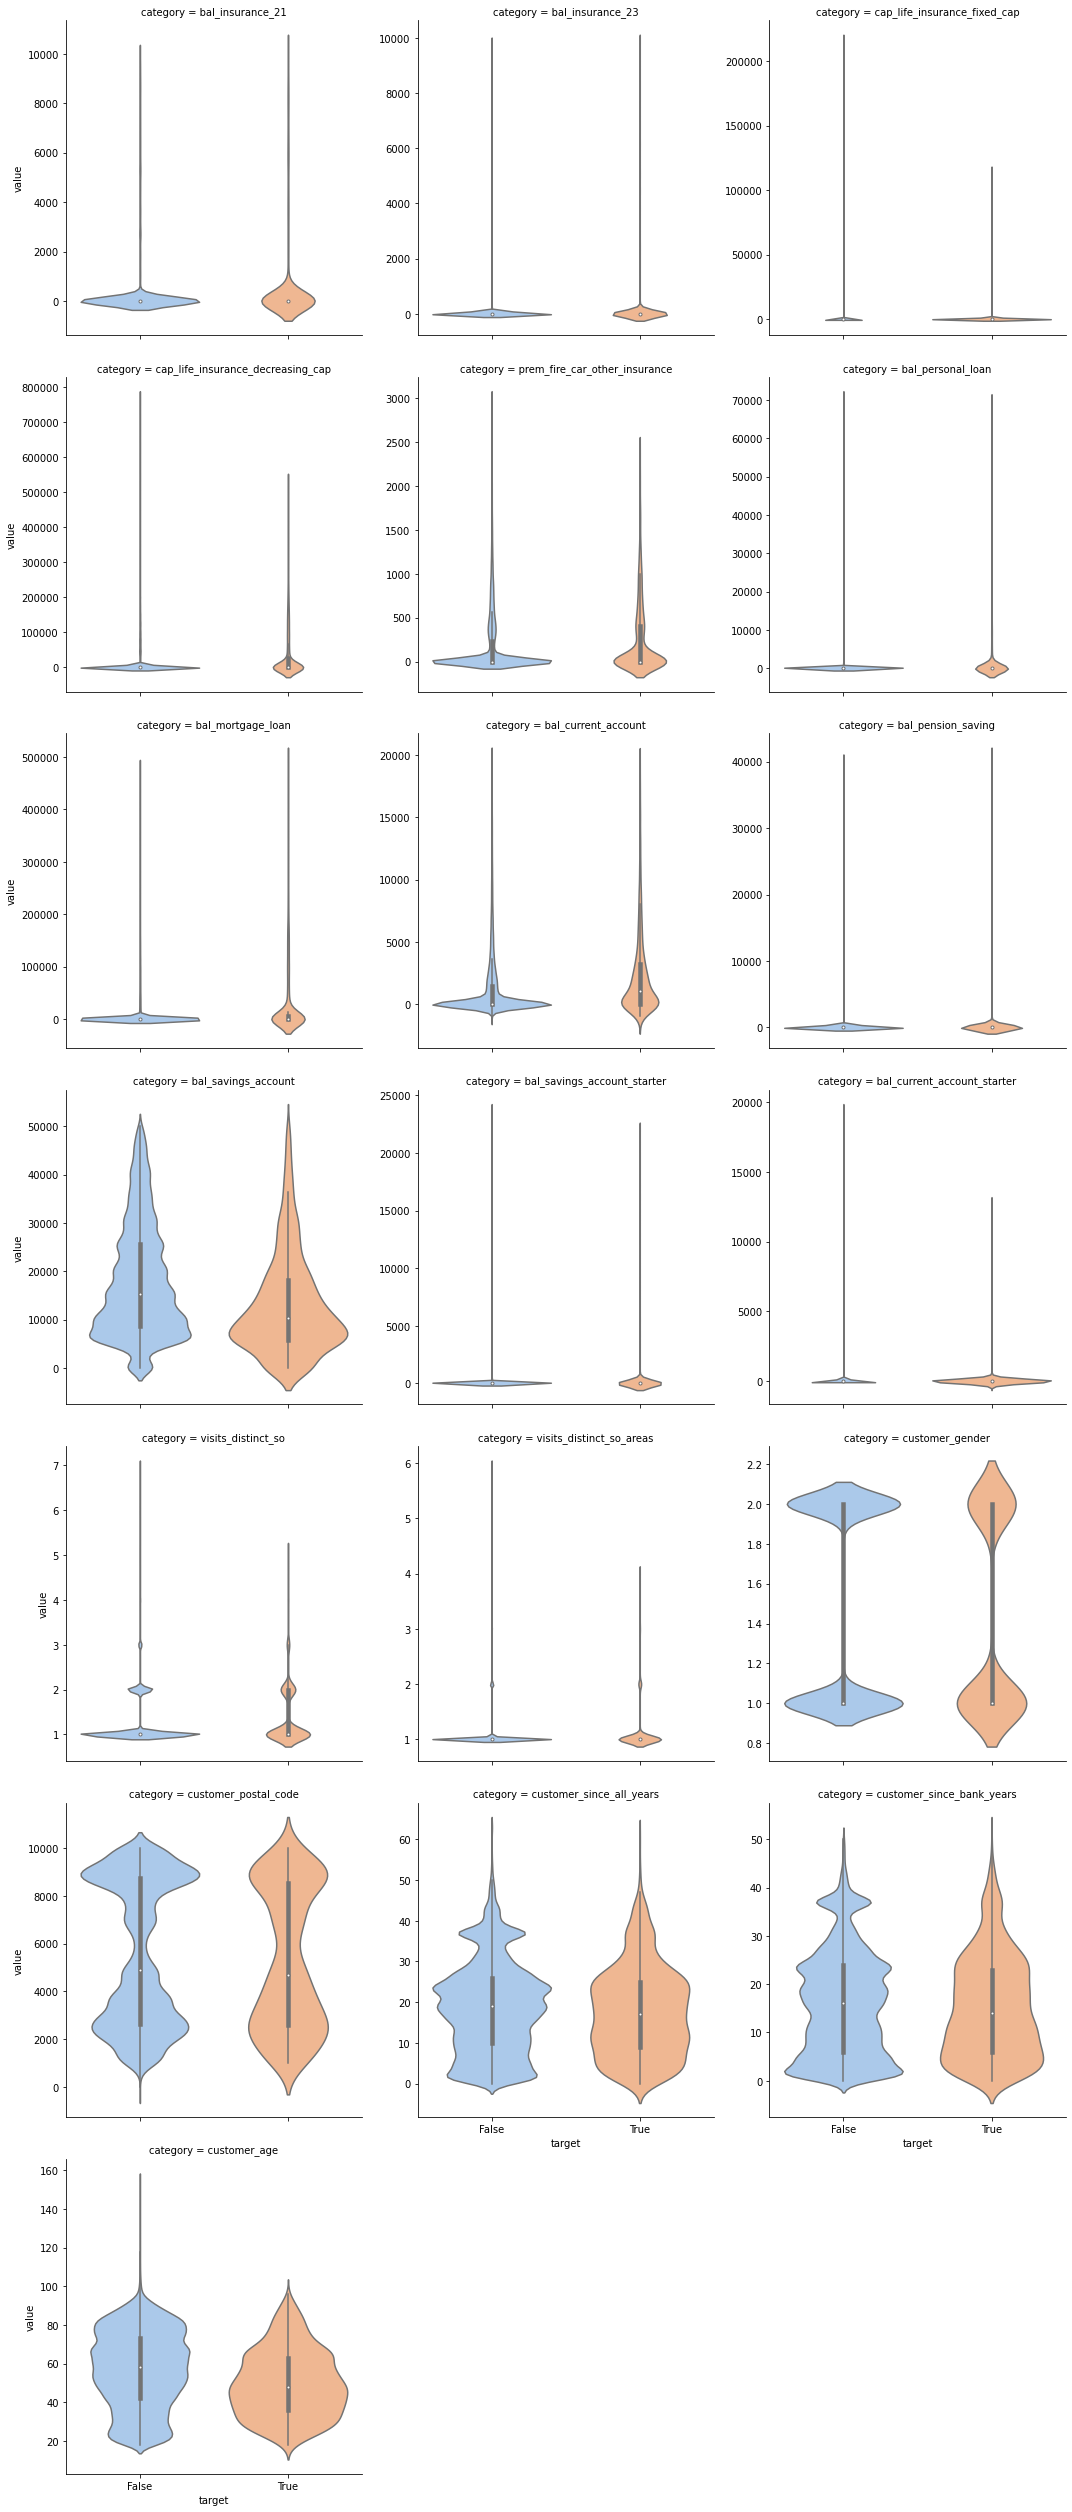

In [21]:
data_melt = data.melt(id_vars = ("client_id","target"), value_vars = cols_cont, var_name = "category")
sns.catplot(data=data_melt
            ,x="target"
            ,y="value"
            ,col="category"
            ,kind="violin"
            ,sharey = False
            ,col_wrap=3);

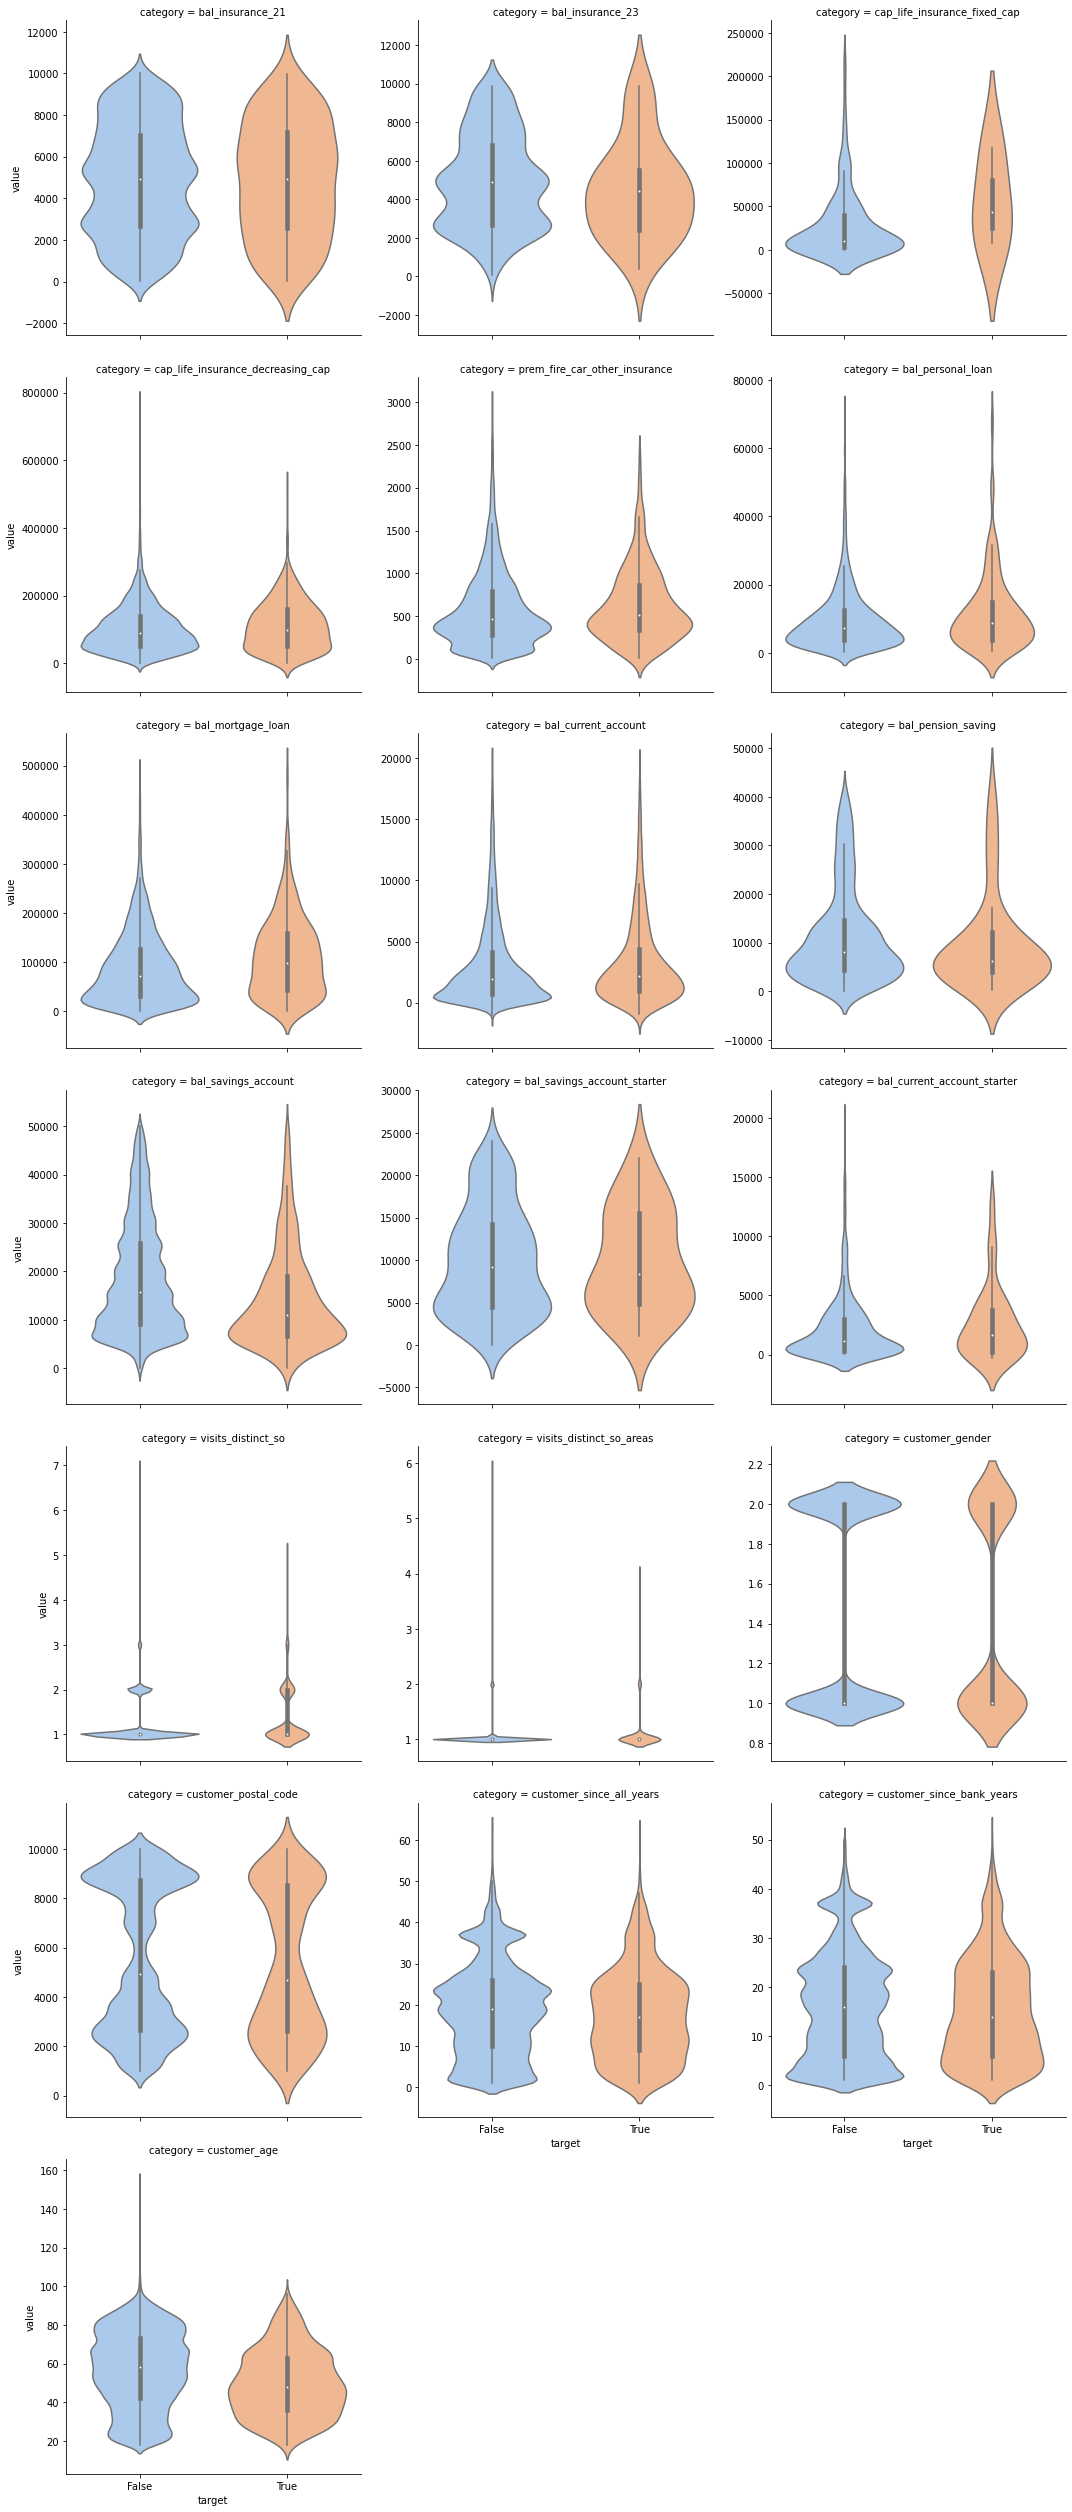

In [22]:
data_melt = data.melt(id_vars = ("client_id","target"), value_vars = cols_cont, var_name = "category")
sns.catplot(data=data_melt[data_melt.value != 0]
            ,x="target"
            ,y="value"
            ,col="category"
            ,kind="violin"
            ,sharey = False
            ,col_wrap=3);

In [23]:
print('-'*65)
print('Customers with savings account balance of 0')
print('-'*65)
print(data[["has_savings_account","bal_savings_account","target"]][data.bal_savings_account <=0].sum())
print('-'*65)
print('Customers with checking account balance <= 0')
print('-'*65)
print(data[["has_current_account","bal_current_account","target"]][data.bal_current_account <=0].sum())

-----------------------------------------------------------------
Customers with savings account balance of 0
-----------------------------------------------------------------
has_savings_account     80
bal_savings_account      0
target                 150
dtype: int64
-----------------------------------------------------------------
Customers with checking account balance <= 0
-----------------------------------------------------------------
has_current_account     4697
bal_current_account   -76380
target                   613
dtype: int64


Take away: just because balance is 0 doesn't mean they doesn't have that account - particularly with savings this combination seems to have a big correlation with churn

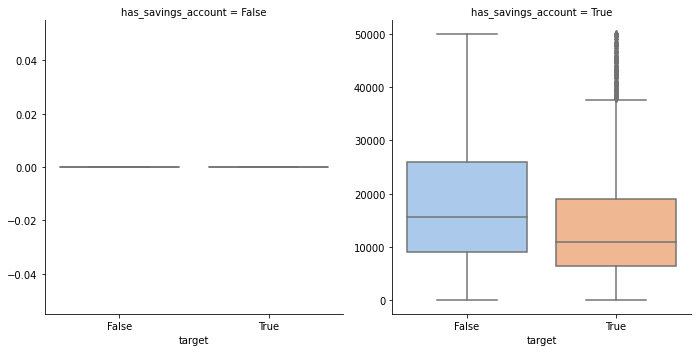

In [24]:
sns.catplot(data = data
            ,x = 'target'
            ,y = 'bal_savings_account'
            # ,hue = 'target'
            ,col = 'has_savings_account'
            ,kind = 'box'
            ,sharey = False
            ).set(ylabel = None)

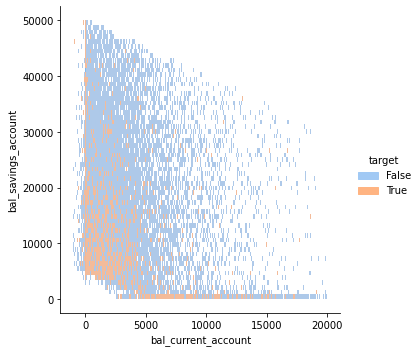

In [25]:
sns.displot(data=data
                , x = 'bal_current_account'
                , y = 'bal_savings_account'
                , hue = 'target'
               )

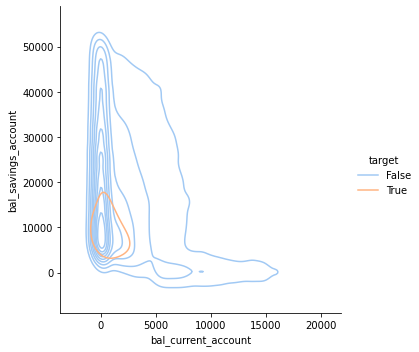

In [26]:
g = sns.displot(data=data
                , x = 'bal_current_account'
                , y = 'bal_savings_account'
                , hue = 'target'
                , kind = 'kde'
               )

## Categorical Data

In [27]:
cols_cat = data.select_dtypes(include = 'object').columns
cols_cat = cols_cat.drop('client_id')

for col in cols_cat:
    print(data[col].value_counts(dropna = False))
    print('-'*50)


9.0        58836
unknown     2002
4.0         1639
0.0          421
8.0          318
6.0          183
5.0          153
7.0          104
1.0           24
3.0           10
2.0            7
Name: customer_occupation_code, dtype: int64
--------------------------------------------------
unknown    47125
3.0         5015
2.0         4506
0.0         2178
5.0         2064
1.0         1802
4.0          696
6.0          311
Name: customer_education, dtype: int64
--------------------------------------------------
unknown       23364
no            22886
mature         4849
adolescent     3912
young          2652
preschool      2322
grownup        1908
onebaby        1466
yes             338
Name: customer_children, dtype: int64
--------------------------------------------------
couple     36179
unknown    14899
single     12619
Name: customer_relationship, dtype: int64
--------------------------------------------------


/opt/anaconda3/envs/BADM/lib/python3.9/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


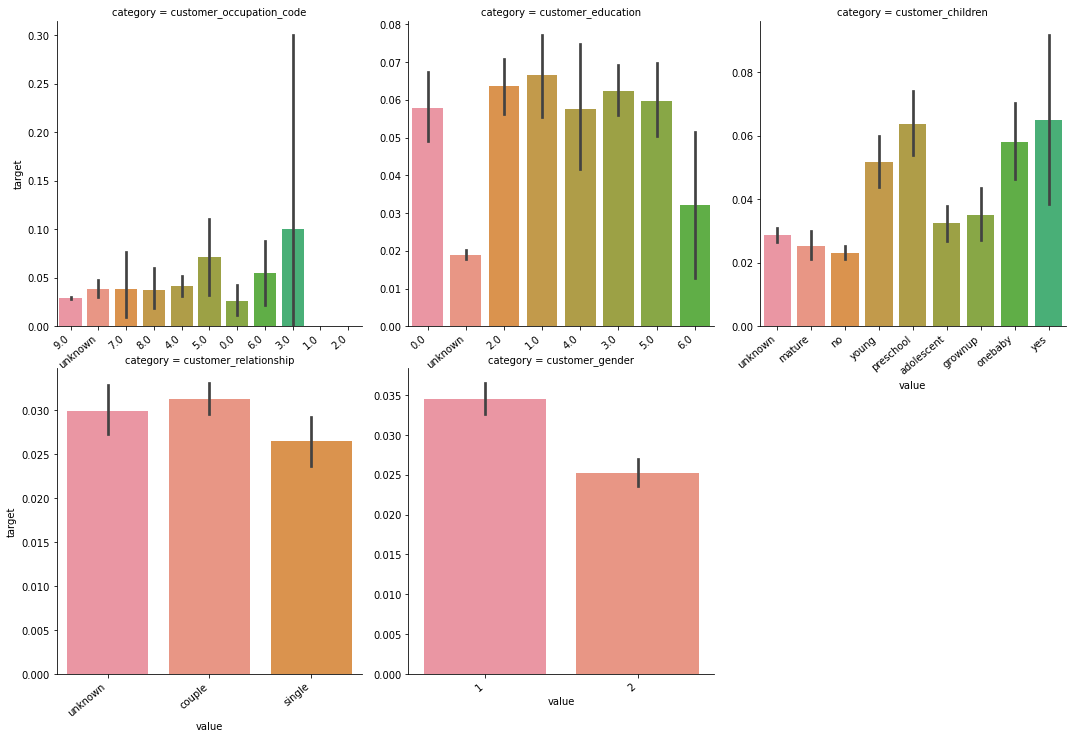

In [28]:
Y = 'target'
cols = ['customer_occupation_code', 'customer_education', 'customer_children',
       'customer_relationship','customer_gender']
    
df = data.melt(id_vars=('client_id', Y), value_vars=cols, var_name='category', value_name='value',ignore_index=True)

g = sns.catplot(data = df
                , kind = 'bar'
                , x = 'value'
                , y = Y
                , col = 'category'
                , sharey = False
                , sharex = False
                , col_wrap = 3
               )
g.set_xticklabels(rotation=40, ha="right")
g.set_ylabels(None)